In [1]:
import numpy as np 
import pandas as pd

# Bar plots

## simple barplot

In [2]:

df = pd.DataFrame({"heights":[2,3,4,5,1,3], 
                   "heights2":[3,4,5,6,3,2],
                   "errors":[0.2,0.3,0.05,0.1,0.3,0.2],
                    "errors2":[0.5,0.5,0.5,0.5,0.5,0.8]})

In [3]:
df

,heights,heights2,errors,errors2
0,2,3,0.20,0.5
1,3,4,0.30,0.5
2,4,5,0.05,0.5
3,5,6,0.10,0.5
4,1,3,0.30,0.5
5,3,2,0.20,0.8


We can use `df.plot(kind="bar")` to do a barplot

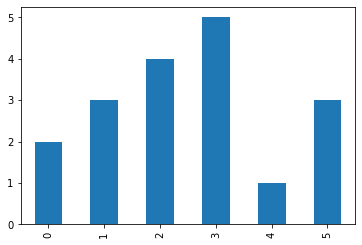

In [4]:
df["heights"].plot(kind="bar")

Colors can be specified in a list

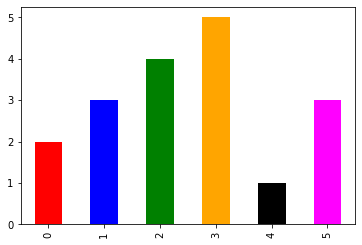

In [5]:
df["heights"].plot(kind="bar",color=["red","blue", "green","orange","black","magenta"])

By default it will create a group for each of the columns in the dataframe.

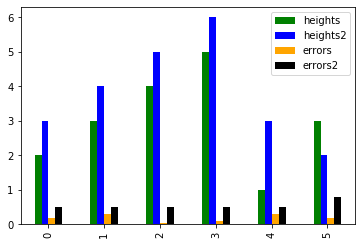

In [47]:
df.plot(kind="bar", color=["g","b","orange","black"])

You can use paletters of colors from seaborn

In [50]:
import seaborn as sns
sns.cubehelix_palette(4)

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.7840440880599453, 0.5292660544265891, 0.6200568926941761],
 [0.5151069036855755, 0.29801047535056074, 0.49050619139300705],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [51]:
sns.light_palette("green")

[array([0.9, 1. , 0.9, 1. ]),
 array([0.72      , 0.90039216, 0.72      , 1.        ]),
 array([0.54      , 0.80078431, 0.54      , 1.        ]),
 array([0.36      , 0.70117647, 0.36      , 1.        ]),
 array([0.18      , 0.60156863, 0.18      , 1.        ]),
 array([0.        , 0.50196078, 0.        , 1.        ])]

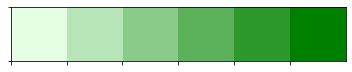

In [49]:
sns.palplot(sns.light_palette("green"))


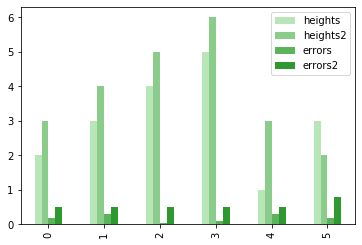

In [54]:
df.plot(kind="bar", 
        color=sns.light_palette("green")[1:5], 
        colormap='Paired')

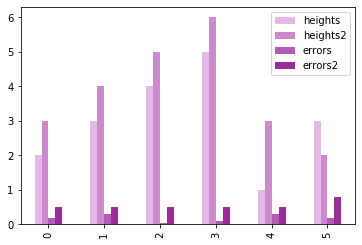

In [60]:
df.plot(kind="bar", 
        color=sns.light_palette("purple", reverse=False)[1:5], 
        colormap='Paired')

In this case though maybe we wanted to use the `"errors"` column to display error bars.

We can do this passing `yerr`



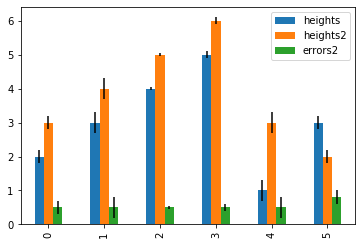

In [34]:
df.plot(kind="bar",yerr="errors")

In [7]:
df_errors = df[["errors", "errors2"]]

In [9]:
#df.plot(kind="bar",yerr=df[["errors", "errors2"]].values.flatten())

In [10]:
df[["errors", "errors2"]].values.flatten()

array([0.2 , 0.5 , 0.3 , 0.5 , 0.05, 0.5 , 0.1 , 0.5 , 0.3 , 0.5 , 0.2 ,
       0.8 ])

In [11]:
df

,heights,heights2,errors,errors2
0,2,3,0.20,0.5
1,3,4,0.30,0.5
2,4,5,0.05,0.5
3,5,6,0.10,0.5
4,1,3,0.30,0.5
5,3,2,0.20,0.8


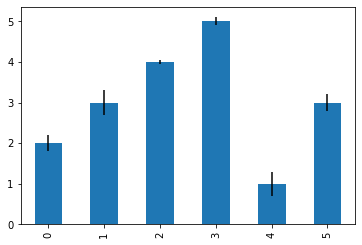

In [12]:
df["heights"].plot(kind="bar",yerr=df["errors"])

## Multi-index barplot

In [13]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], 
                                 names=['letter', 'word'])


In [14]:
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 
                    'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, 
                    index=ix3)


In [15]:
df3

data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5

In [16]:
gp3 = df3.groupby(level=('letter', 'word'))

In [17]:
gp3

In [18]:
means = gp3.mean()

In [19]:
errors = gp3.std()

In [20]:
means

data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5

In [21]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

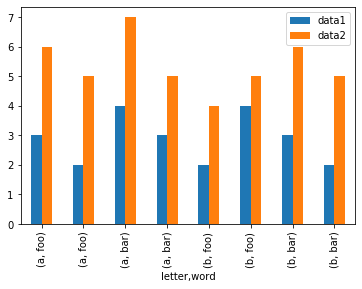

In [22]:
df3.plot(kind="bar")

In [23]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

In [24]:
df3

data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5

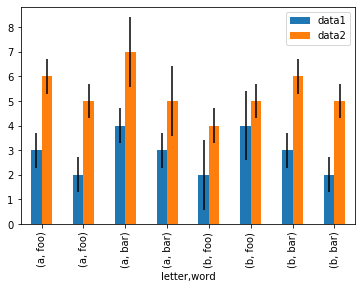

In [25]:
df3.plot(kind="bar", yerr=errors)